In [1]:
import fbprophet
from scipy.stats import boxcox
import pandas as pd

In [228]:
df=pd.read_csv('Downloads/bq-results-20191101-123856-amsi0e3qolhg (2).csv')
df['Date']=df['Date'].apply(lambda x: str(x)[:4]+"-"+str(x)[4:6]+"-"+str(x)[6:8])
df['Date']=pd.to_datetime(df['Date'])
df['ds'] = df['Date']
df['y'] = df['values']
df=df.set_index('Date')
#df['y'], lam = boxcox(df['values'])
df=df.loc['2016-01-01':'2019-07-01']
df['cap']=np.max(df.y)*1.15
df=df.dropna()
m = fbprophet.Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
m.plot(forecast,xlabel='date', ylabel='relative publishing');

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


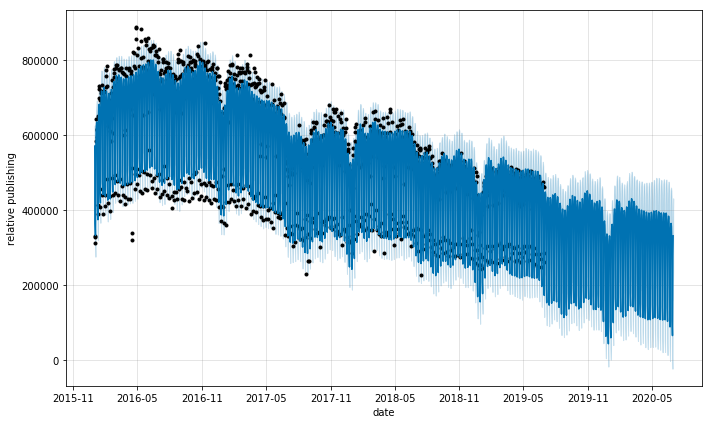

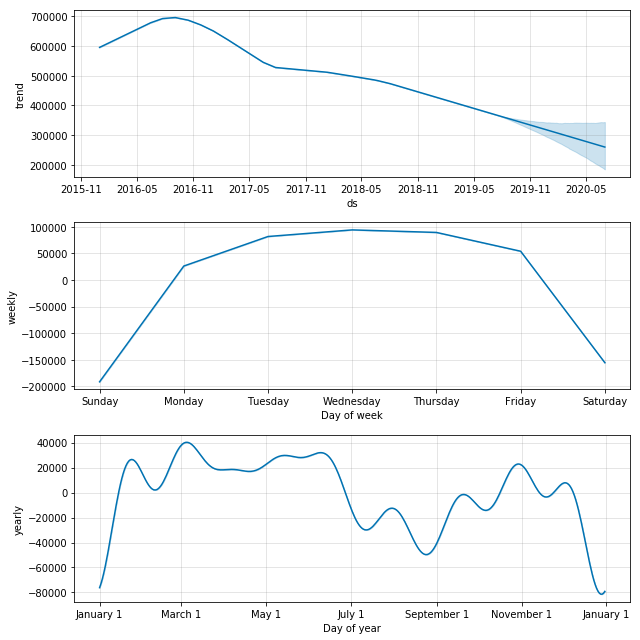

In [235]:
m.plot_components(forecast);

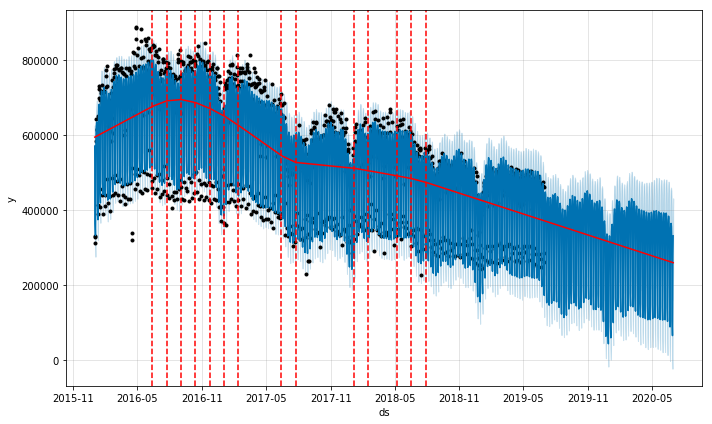

In [236]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


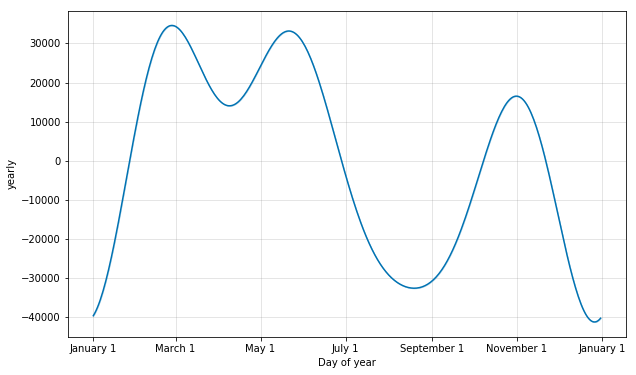

In [237]:
from fbprophet.plot import plot_yearly
m = fbprophet.Prophet(yearly_seasonality=4).fit(df)
a = plot_yearly(m)


In [238]:
if 0==1:
    from scipy.special import inv_boxcox
    forecast['yhat'] = forecast['yhat'].apply(lambda x: inv_boxcox(x, lam))
    forecast['yhat_upper'] = forecast['yhat_upper'].apply(lambda x: inv_boxcox(x, lam))
    forecast['yhat_lower'] = forecast['yhat_lower'].apply(lambda x: inv_boxcox(x, lam))